<a href="https://colab.research.google.com/github/Teresa-Yang/AI-Final-Research-Project/blob/main/Project_Chess_Classification_Teresa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Project: Chess (King-Rook vs. King-Pawn) Classification
### By: Teresa Yang

# Setup

In [1]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

'3.2.0'

In [2]:
# loading dataset
import pandas as pd
#from pycaret.datasets import get_data

file_path = '/content/chess_data/kr-vs-kp.data'
data = pd.read_csv(file_path, header = None)
data.columns = ['bkblk','bknwy','bkon8','bkona','bkspr','bkxbq','bkxcr','bkxwp','blxwp','bxqsq','cntxt','dsopp','dwipd',
                'hdchk','katri','mulch','qxmsq','r2ar8','reskd','reskr','rimmx','rkxwp','rxmsq','simpl','skach','skewr',
                'skrxp','spcop','stlmt','thrsk','wkcti','wkna8','wknck','wkovl','wkpos','wtoeg','result']
print(data)

     bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... spcop  \
0        f     f     f     f     f     f     f     f     f     f  ...     f   
1        f     f     f     f     t     f     f     f     f     f  ...     f   
2        f     f     f     f     t     f     t     f     f     f  ...     f   
3        f     f     f     f     f     f     f     f     t     f  ...     f   
4        f     f     f     f     f     f     f     f     f     f  ...     f   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
3191     t     f     f     f     f     f     t     f     f     f  ...     f   
3192     t     f     f     f     f     f     t     f     f     f  ...     f   
3193     t     f     f     f     f     f     t     f     f     f  ...     f   
3194     t     f     t     f     f     f     t     f     f     f  ...     f   
3195     t     f     t     f     f     f     t     f     f     f  ...     f   

     stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoe

In [3]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'result', session_id = 123)

,Description,Value
0,Session id,123
1,Target,result
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# init setup on exp
exp.setup(data, target = 'result', session_id = 123)

,Description,Value
0,Session id,123
1,Target,result
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3196, 37)"
5,Transformed data shape,"(3196, 39)"
6,Transformed train set shape,"(2237, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


# Compare Models

In [5]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.4140
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,4.7260
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.7320
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,0.8570
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.6350
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.6450
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.8240
ada,Ada Boost Classifier,0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303,0.6570
lr,Logistic Regression,0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223,1.1910
svm,SVM - Linear Kernel,0.9602,0.0000,0.9602,0.9612,0.9602,0.9203,0.9213,0.4080


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [6]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9946,0.9948,0.9946,0.9947,0.9946,0.9893,0.9893,0.4420
catboost,CatBoost Classifier,0.9933,0.9992,0.9933,0.9934,0.9933,0.9866,0.9866,4.0550
xgboost,Extreme Gradient Boosting,0.9911,0.9993,0.9911,0.9911,0.9911,0.9821,0.9821,0.5540
lightgbm,Light Gradient Boosting Machine,0.9911,0.9994,0.9911,0.9911,0.9911,0.9821,0.9822,1.1310
et,Extra Trees Classifier,0.9902,0.9988,0.9902,0.9903,0.9902,0.9803,0.9804,0.8570
rf,Random Forest Classifier,0.9888,0.9986,0.9888,0.9889,0.9888,0.9776,0.9777,0.7770
gbc,Gradient Boosting Classifier,0.9794,0.9974,0.9794,0.9797,0.9794,0.9588,0.9591,0.9140
ada,Ada Boost Classifier,0.9651,0.9929,0.9651,0.9653,0.9651,0.9301,0.9303,0.5390
lr,Logistic Regression,0.9611,0.9921,0.9611,0.9613,0.9611,0.9220,0.9223,0.4510
svm,SVM - Linear Kernel,0.9602,0.0000,0.9602,0.9612,0.9602,0.9203,0.9213,0.6310


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

# Analyze Model

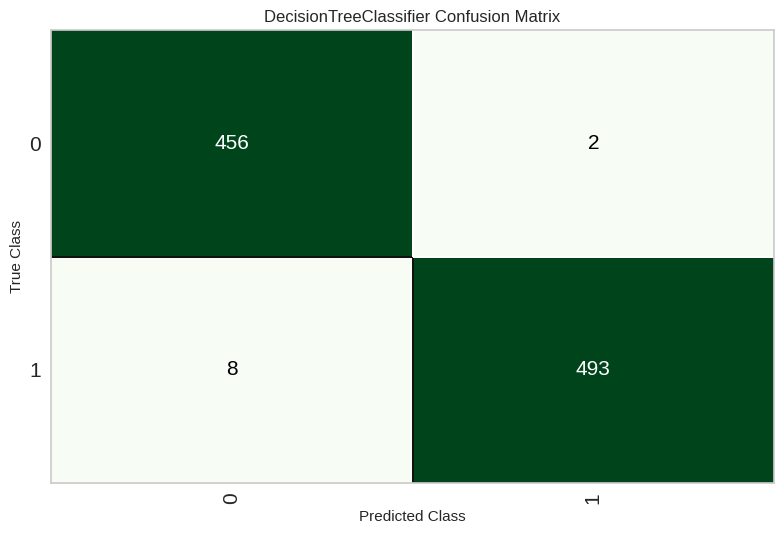

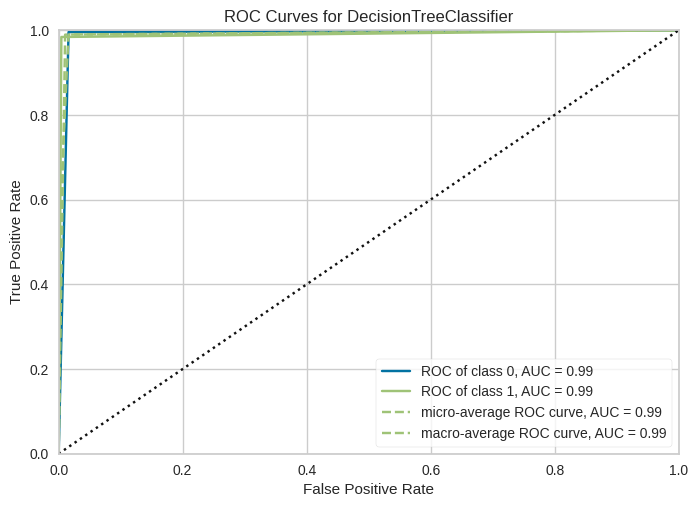

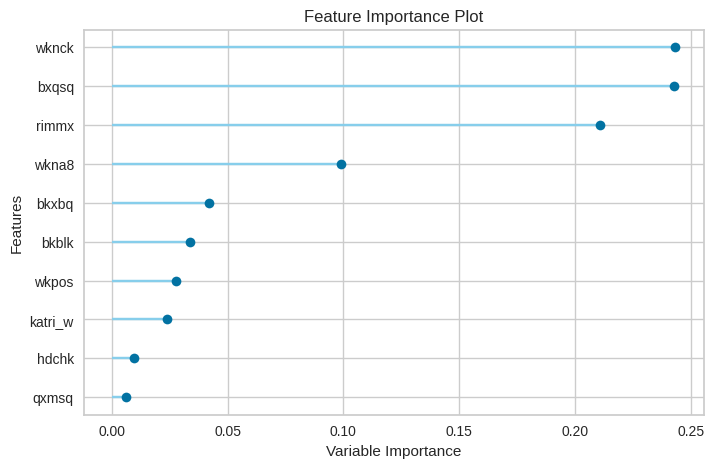

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [7]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

# plot AUC
plot_model(best, plot = 'auc')

# plot feature importance
plot_model(best, plot = 'feature')

evaluate_model(best)

# Prediction

In [8]:
# predict on test set
holdout_pred = predict_model(best)

# show predictions df
holdout_pred.head()

# copy data and drop Class variable
new_data = data.copy()
new_data.drop('result', axis=1, inplace=True)
new_data.head()

# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9896,0.9898,0.9896,0.9897,0.9896,0.9791,0.9792


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,prediction_label,prediction_score
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,t,t,n,won,1.0
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,t,t,n,won,1.0
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,t,t,n,won,1.0
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,t,t,n,won,1.0
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,t,t,n,won,1.0


# Save Model

In [9]:
# save pipeline
save_model(best, 'my_first_pipeline')

# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='...
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=123, splitter='best'))],
         verbose=False)